In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('../csv/modeled_descriptor_dataset.csv')
df

,melodic/bittersweet/sentimental/romantic,spiritual/atmospheric/surreal/dense/mysterious,progressive/dense/epic,energetic/raw/rebellious/noisy/angry-warm/calm/natural/acoustic/pastoral,cold/dark/sad/atmospheric/anxious/mysterious/serious-quirky/happy
0,0.428571,0.000000,0.000000,-0.538462,-0.481481
1,0.714286,0.703704,0.428571,0.733333,-0.444444
2,0.619048,0.000000,0.000000,-0.087179,0.037037
3,0.904762,0.407407,0.428571,0.400000,0.111111
4,0.523810,0.481481,0.523810,0.000000,-0.555556
...,...,...,...,...,...
444,0.809524,0.555556,0.000000,-0.005128,-0.444444
445,0.619048,0.000000,0.000000,0.230769,0.074074
446,0.523810,0.629630,0.619048,-0.087179,-0.666667
447,0.714286,0.481481,0.619048,0.400000,-0.481481


### Final Trimming

In the notebook "03_Dataframe_Building.ipynb" we cut some albums out for not preseting enough descriptors. Since at last we have decided which features will be in our final dataset, it makes sense to run the same process again, this time discarding albums which don't present enough of these 5 compositions (features). Our threshold number will be 3: therefore albums that don't have at least 3/5 columns different than 0 will be cut off from the final dataset.

The reasoning, as previously described in "03_Dataframe_Building.ipynb" is that albums which don't present any value for a certain number of features likely are that way not because they don't present that sound characteristic, but because they just weren't popular enough for users to vote on them thoroughly. Therefore, the positioning of these albums in the vector space is probably not according to their actual sound characteristics, and will be unfortunately acting as "noise" in the vector space. This is especially true in this stage of modeling, since all our current features are compositions of many many different descriptors, so having a value of "0" in most of these 5 features is pretty telling that that album's descriptors just weren't appropriately voted on.

In [61]:
df['count_nonzero'] = df.apply(lambda row: (row != 0).sum(), axis=1)
print(df['count_nonzero'].mean())

3.933184855233853


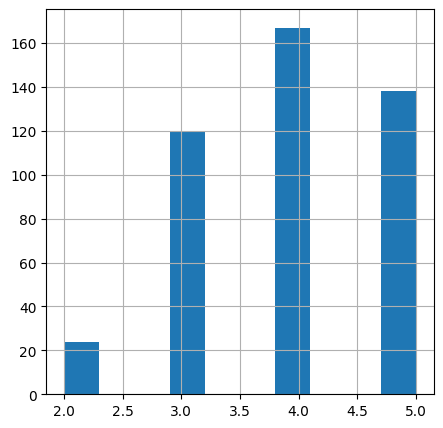

In [62]:
p = df['count_nonzero'].hist(figsize = (5,5))

In [63]:
df_trim = df[df['count_nonzero'] >= 3]
df_trim.drop('count_nonzero', axis=1, inplace=True)

C:\Users\Arthu\AppData\Local\Temp\ipykernel_20420\474341099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim.drop('count_nonzero', axis=1, inplace=True)


In [64]:
df_trim

,melodic/bittersweet/sentimental/romantic,spiritual/atmospheric/surreal/dense/mysterious,progressive/dense/epic,energetic/raw/rebellious/noisy/angry-warm/calm/natural/acoustic/pastoral,cold/dark/sad/atmospheric/anxious/mysterious/serious-quirky/happy
0,0.428571,0.000000,0.000000,-0.538462,-0.481481
1,0.714286,0.703704,0.428571,0.733333,-0.444444
2,0.619048,0.000000,0.000000,-0.087179,0.037037
3,0.904762,0.407407,0.428571,0.400000,0.111111
4,0.523810,0.481481,0.523810,0.000000,-0.555556
...,...,...,...,...,...
443,0.428571,0.925926,0.428571,0.733333,-0.555556
444,0.809524,0.555556,0.000000,-0.005128,-0.444444
445,0.619048,0.000000,0.000000,0.230769,0.074074
446,0.523810,0.629630,0.619048,-0.087179,-0.666667


In [65]:
df_trim.to_csv('../csv/trimmed_dataset.csv', index=False)